In [10]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import seaborn as sns
from heatmap import HeatMap
from matplotlib.animation import FuncAnimation
from matplotlib import cm

In [215]:
data_ = h5py.File("/home/samani/Documents/projects/master_project/model/results/model_7/output_data.h5", "a")
#for i in range(4, 30):
#del data_[f"elite_individual_30_evolution_one"]
print(data_.keys())
data_.close()

<KeysViewHDF5 ['elite_individual_1_evolution_one', 'elite_individual_2_evolution_one', 'elite_individual_3_evolution_one', 'evolution_costs_one', 'original_target', 'run_time', 'zoomed_in_target']>


In [210]:
#with h5py.File("/home/samani/Documents/projects/master_project/model/results/model_7/data.h5", 'a') as hdf:
    # Step 2: Define new data to add
    #new_data = np.array([[1, 2, 3], [4, 5, 6]])  # Example new array
    
    # Step 3: Create a new dataset with a new key
    #hdf.create_dataset('target', data=t)

In [211]:
#t = data_["original_target"]
#plt.plot(data_["cost"][:])
print(data_["target"].shape)
#sns.heatmap(data_["original_target"][1])

(2, 100, 100)


In [143]:
file_path = "/home/samani/Documents/projects/master_project/model/results/model_6/output_data.h5"
with h5py.File(file_path, "a") as data_:
    old_dataset_name = "elite_individual_49_evolution_one" # Change this to your actual old dataset name
    new_dataset_name = "elite_individual_3_evolution_one" # Change this to your desired new dataset name

    # Check if the old dataset exists
    if old_dataset_name in data_:
        # Retrieve data from the old dataset
        old_data = data_[old_dataset_name][()]  # Read the data

        # Create a new dataset with the desired name and copy the data
        data_[new_dataset_name] = old_data

        # Optionally, you can copy attributes if they exist
        for attr in data_[old_dataset_name].attrs:
            data_[new_dataset_name].attrs[attr] = data_[old_dataset_name].attrs[attr]

        # Delete the old dataset
        del data_[old_dataset_name]
        print(f"Renamed '{old_dataset_name}' to '{new_dataset_name}'")

    else:
        print(f"Dataset '{old_dataset_name}' does not exist.")

Renamed 'elite_individual_49_evolution_one' to 'elite_individual_3_evolution_one'


In [132]:
f = data_['elite_individual_49_evolution_one'][:]

In [87]:
import numpy as np

# Assuming data_["target"] and data_["simulation_results"] are defined and have compatible shapes
target = data_["target"][:]  # 2D target (height, width)
optimization_result = data_["simulation_results"][:]  # 3D result (depth, height, width)

# Initialize accuracy array
accuracy = np.zeros((optimization_result.shape[0],))

# Iterate over each depth slice of the optimization result
for i in range(optimization_result.shape[0]):
    # Calculate pixel-wise differences
    diff = np.sum(np.abs(target- optimization_result[i]))  # Absolute differences
    total_target = np.sum(np.abs(target))  # Total sum of target values
    acc_ = (total_target  / diff) * 100  # Calculate accuracy as a percentage
    accuracy[i] = acc_


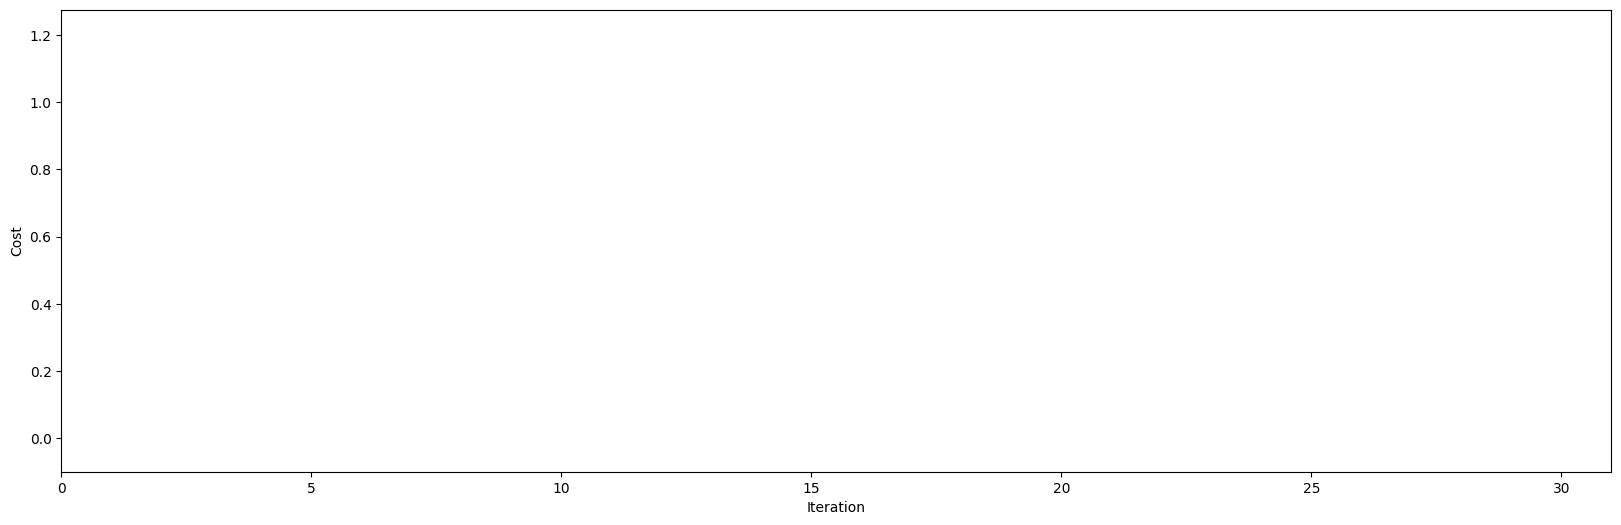

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sample costs data for demonstration
# Replace this with your actual data
costs = data_["cost"][:]  # Assuming data_ is your data source
generations = len(costs)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 6))
xdata, ydata = [], []
ln, = ax.plot([], [], 'go', markersize=9)  # Red dots for costs


def init():
    ax.set_xlim(0, generations + 1)  # Set x limit to the number of generations
    ax.set_ylim(-.1, np.max(costs) * 1.01)  # Set y limit slightly above max cost
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Cost')
    return ln,

def update(frame):
    # Append the current generation and its corresponding cost
    xdata.append(frame)
    ydata.append(costs[frame])
    ln.set_data(xdata, ydata)  # Update the line data
    return ln,

# Create the animation
ani = FuncAnimation(fig, update, frames=generations,  # Iterate through each generation
                    init_func=init, blit=True)

# Show the animation
plt.show()

# Save the animation as a GIF (optional)
#ani.save('cost_animation.gif', writer='imagemagick', fps=10)
ani.save('cost_animation.mp4', writer='ffmpeg', fps=5)



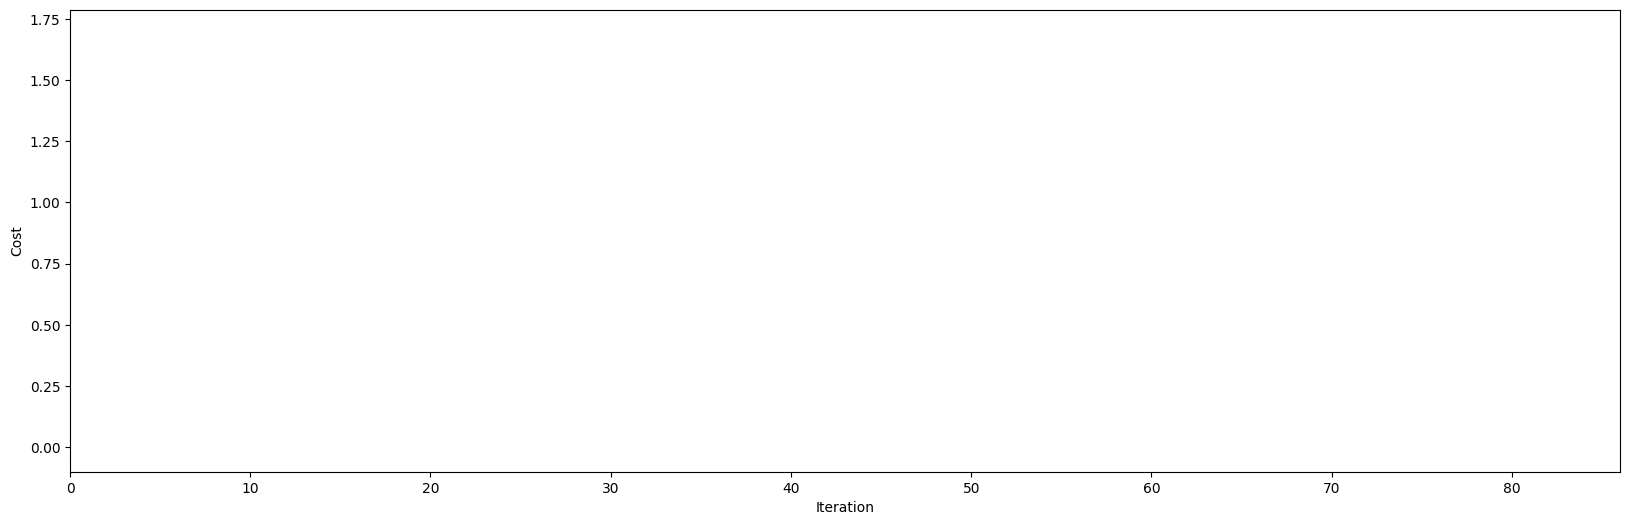

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sample data (replace this with your actual data)
# Assuming 'cost' has two columns and you want to use the first column
costs = data_["cost"][:, 0]  # Select the first column (or adjust as needed)
generations = costs.shape[0]  # Number of generations

# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 6))
xdata, ydata = [], []
ln, = ax.plot([], [], 'go', markersize=9)  # Green dots for costs
line, = ax.plot([], [], 'r-', lw=2)  # Red line for costs

def init():
    ax.set_xlim(0, generations + 1)  # Set x limit to the number of generations
    ax.set_ylim(-0.1, np.max(costs) * 1.01)  # Set y limit slightly above max cost
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Cost')
    return ln, line

def update(frame):
    # Append the current generation and its corresponding cost
    xdata.append(frame)
    ydata.append(costs[frame])
    ln.set_data(xdata, ydata)  # Update the dot data
    line.set_data(np.arange(frame + 1), costs[:frame + 1])  # Update the line data
    return ln, line

# Create the animation
ani = FuncAnimation(fig, update, frames=generations,  # Iterate through each generation
                    init_func=init, blit=True)

# Show the animation
plt.show()

# Save the animation as a GIF
ani.save('cost_animation.gif', writer='imagemagick', fps=5)

# Save the animation as an MP4
ani.save('cost_animation.mp4', writer='ffmpeg', fps=5)


(100, 100)


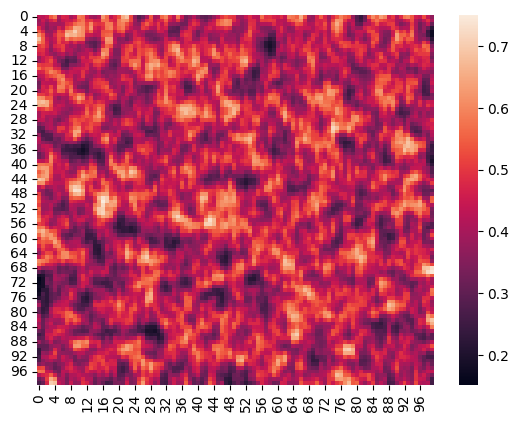

In [80]:
sns.heatmap(data_["simulation_results"][0, :, :])
print(data_["target"].shape)

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

def generate_heatmap_video(data, output_path='heatmap_video.mp4', fps=10, colormap='plasma', figsize=(6, 6)):
    """
    Generates a video showing the evolution of a heatmap over iterations.

    Parameters:
    - data: 3D numpy array of shape (z, x, y), where z is the number of iterations.
    - output_path: Path to save the video file.
    - fps: Frames per second for the video.
    - colormap: The colormap to use for the heatmap.
    - figsize: Tuple to define the width and height of each frame in inches (Matplotlib figsize).
    """
    # Set up Matplotlib figure for heatmap generation
    z, x, y = data.shape
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(data[0], cmap=colormap, vmin=data.min(), vmax=data.max())

    # Remove axis ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])
    plt.axis('off')  # Hide axis completely

    # Create a temporary directory to store frames
    temp_dir = 'temp_frames'
    if not os.path.exists(temp_dir):
        os.makedirs(temp_dir)

    # Generate heatmap frames for each iteration
    for i in range(z):
        ax.clear()
        ax.imshow(data[i], cmap=colormap, vmin=data.min(), vmax=data.max())
        
        # Remove axis ticks and labels for each frame
        ax.set_xticks([])
        ax.set_yticks([])
        plt.axis('off')

        # Save the frame as a temporary image file
        temp_frame_path = os.path.join(temp_dir, f"frame_{i:04d}.png")
        plt.savefig(temp_frame_path, bbox_inches='tight', pad_inches=0)
        
    plt.close(fig)

    # Collect the frames and create a video using OpenCV
    frame_files = [os.path.join(temp_dir, f) for f in sorted(os.listdir(temp_dir))]
    frame = cv2.imread(frame_files[0])
    height, width, layers = frame.shape

    video = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    for frame_file in frame_files:
        frame = cv2.imread(frame_file)
        video.write(frame)

    video.release()

    # Clean up temporary frames
    for frame_file in frame_files:
        os.remove(frame_file)
    os.rmdir(temp_dir)

    print(f"Video saved to {output_path}")

In [187]:
generate_heatmap_video(data_["simulation_results"][1], output_path='optimized_heatmap_video4.mp4', fps=5, figsize=(12, 12), colormap='magma')
#generate_heatmap_video(data_["simulation_results"][:], output_path='optimization_process.mp4', fps=10)

Video saved to optimized_heatmap_video4.mp4


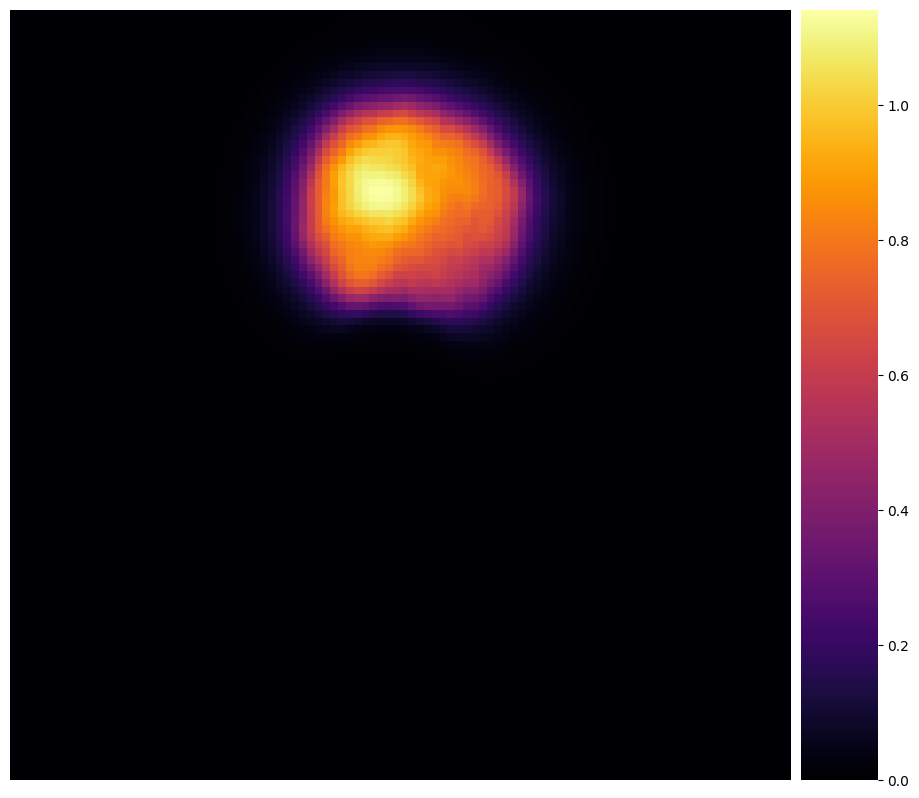

In [203]:
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(t[0], cmap='inferno', cbar=True, 
             cbar_kws={'orientation': 'vertical', 'pad': 0.01, 'aspect': 10})

plt.axis('off')  # Optional: turn off axis if you want a clean look

# Save the figure
plt.savefig('heatmap.png', bbox_inches='tight', dpi=300)  # Save as PNG with tight layout and 300 dpi

plt.show()  # Display the figure


In [19]:
def create_heatmap_video(data, save_path, colormap='viridis', fps=10, interval=100, color_bar=False, figsize=(6, 6)):
    """
    Create a heatmap video from 3D data (z, x, y), where z is time.

    Parameters:
    - data: 3D numpy array of shape (z, x, y)
    - save_path: Path to save the resulting video (e.g., "output.mp4")
    - colormap: Colormap for the heatmap (default is 'viridis')
    - fps: Frames per second for the video (default is 5)
    - interval: Delay between frames in milliseconds (default is 100)
    - color_bar: Whether to include a color bar in the animation (default is False)
    - figsize: Tuple specifying the figure size (default is (6, 6))
    """
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Display the initial frame
    img = ax.imshow(data[0, :, :], cmap=colormap, aspect='auto')
    if color_bar:
        plt.colorbar(img, ax=ax)

    # Update function for the animation
    def update(frame):
        img.set_array(data[frame, :, :])
        ax.set_title(f"Frame {frame + 1}/{data.shape[0]}")
    
    # Create animation
    anim = FuncAnimation(fig, update, frames=data.shape[0], interval=interval)
    anim.save(save_path, fps=fps, writer='ffmpeg')
    plt.close(fig)
    print(f"Video saved at {save_path}")


In [21]:
create_heatmap_video(
    data["simulation_results"][:],
    save_path="sim_result.mp4",
    colormap='hot',
    fps=10,
    interval=50,
    color_bar=False,
    figsize=(10, 10)
)

Video saved at sim_result.mp4


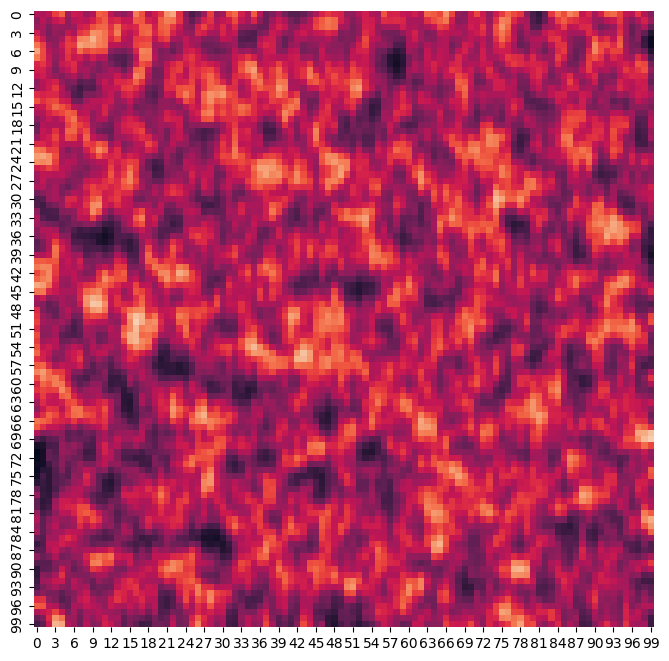

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation

# Define the dimensions and create random 3D data
dimension = (20, 100, 100)  # (z, x, y) where z is the number of frames
data = data_["simulation_results"][:] # Create a 3D array with random data

fig, ax = plt.subplots(figsize=(8, 8))  # Adjust figure size if necessary

# Create the initial heatmap
heatmap = sns.heatmap(data[0], ax=ax, vmax=.8, cbar=False, annot=False, fmt=".2f")

# Initialize function to clear the axis and set the initial frame
def init():
    ax.clear()
    sns.heatmap(data[0], ax=ax, vmax=.8, cbar=False, annot=False, fmt=".2f")

# Define the animate function, updating the heatmap with each frame in data
def animate(i):
    ax.clear()
    sns.heatmap(data[i], ax=ax, vmax=.8, cbar=False, annot=False, fmt=".2f")
    ax.set_title(f"Frame {i+1}")  # Optional: Set a title to track frames
    return ax

# Create the animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=dimension[0], repeat=False)

# Display the animation
plt.show()

# Save the animation as a GIF
ani.save('animated_heatmap.gif', writer='pillow', fps=10, dpi=500)



In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

def create_heatmap_video(data, output_filename="heatmap_video.mp4", fps=10, colormap="viridis"):
    """
    Creates a heatmap video from a 3D array.

    Parameters:
    - data: 3D numpy array (frames, height, width) representing the heatmap data over time.
    - output_filename: str, path to save the output video.
    - fps: int, frames per second for the video.
    - colormap: str, color map to use for the heatmap.
    """
    # Create a temporary directory to store the heatmap frames
    if not os.path.exists("frames"):
        os.makedirs("frames")

    height, width = data.shape[1], data.shape[2]
    frames = []

    # Generate heatmap images for each frame in the data
    for i, frame in enumerate(data):
        plt.figure(figsize=(6, 6))
        plt.imshow(frame, cmap=colormap, interpolation='nearest')
        plt.colorbar()
        plt.axis('off')
        
        # Save each frame as an image
        frame_path = f"frames/frame_{i}.png"
        plt.savefig(frame_path, bbox_inches='tight', pad_inches=0)
        plt.close()
        
        # Read saved frame and add it to the frames list
        frame_img = cv2.imread(frame_path)
        frames.append(frame_img)
        
        # Optional: Remove the frame file after reading it
        os.remove(frame_path)
    
    # Define video writer object
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    video_writer = cv2.VideoWriter(output_filename, fourcc, fps, (width, height))

    # Write frames to the video
    for frame in frames:
        video_writer.write(frame)

    # Release the video writer
    video_writer.release()

    # Clean up by removing frames directory if it's empty
    if os.path.exists("frames") and not os.listdir("frames"):
        os.rmdir("frames")

    print(f"Heatmap video saved to {output_filename}")

# Example usage:
# Create a random 3D array as an example data input (e.g., 50 frames, 100x100 resolution)
data = np.random.random((50, 100, 100))
create_heatmap_video(data)


Heatmap video saved to heatmap_video.mp4


In [11]:
import numpy as np

# Assuming `arr` is your array with shape (z, y, x)
arr = np.random.rand(3, 4, 5)  # Example array with shape (z, y, x)

# Transpose the array to shape (x, y, z)
arr_transposed = arr.transpose(2, 1, 0)

# Check the new shape
print(arr_transposed.shape)  # Should output (x, y, z)


(5, 4, 3)


It's Done!


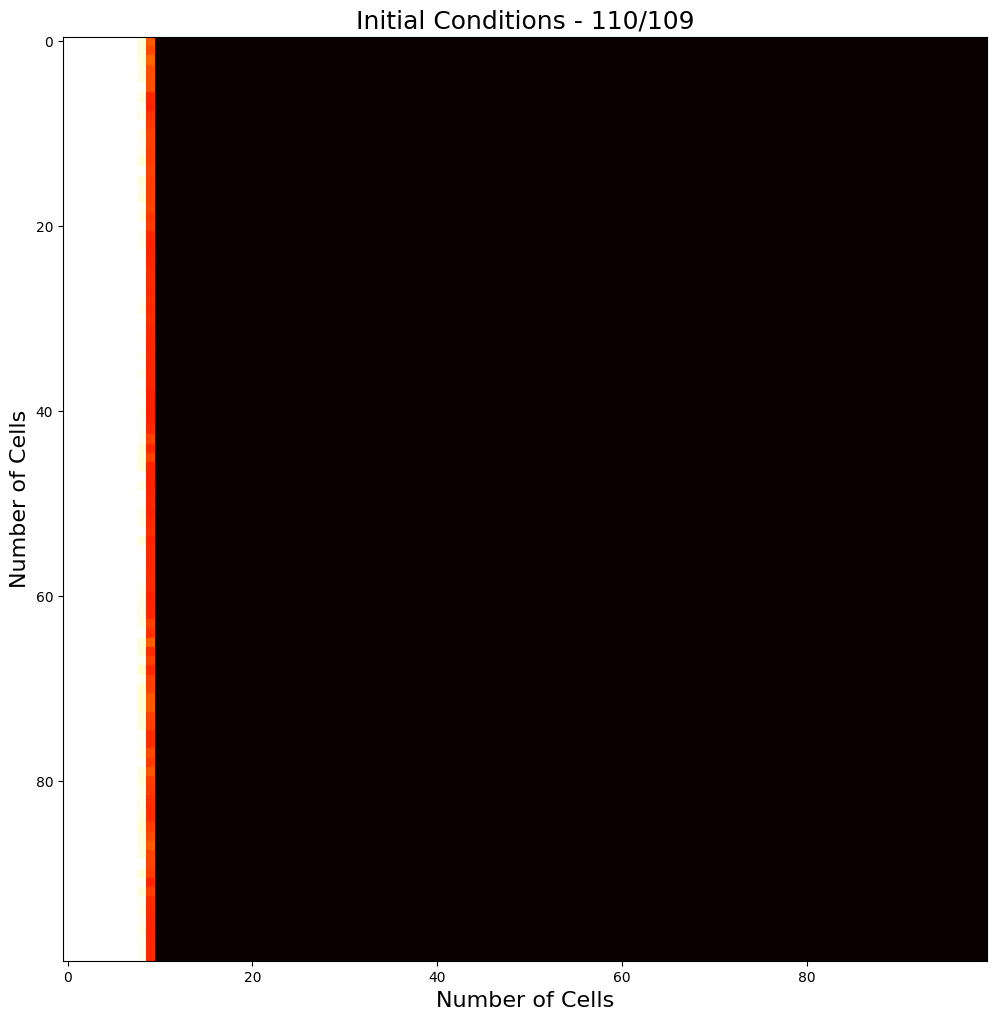

In [5]:
model1 = HeatMap(
    data_path="/home/samani/Documents/projects/master_project/new_/data_.h5",
    video_directory="/home/samani/Documents/sim/",
    video_name="simulation_results",
    title="Initial Conditions",
    x_label="Number of Cells",
    y_label="Number of Cells",
    c_map="hot",
    fps=5,
    interval=50,
    writer='ffmpeg',
    color_bar=False,
    norm=False,
    pad=0.3
)

model1.heatmap_animation(key="t")

In [246]:
data = h5py.File("/home/samani/Documents/projects/master_project/model/results/model_7/phage4.h5", "a")
print(data.keys())

<KeysViewHDF5 ['agent', 'cost', 'initial_conditions', 'simulation_results', 'target', 'time']>


In [248]:
ag = data["agent"][:]
target = data['target'][0,: , :]
print(target.shape)

(50, 50)


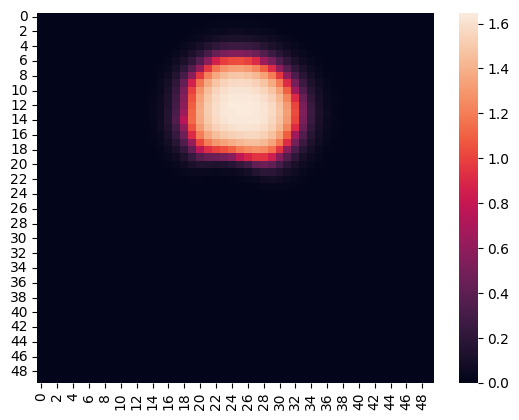

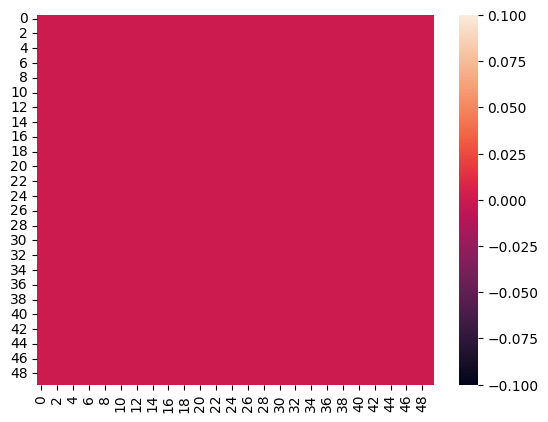

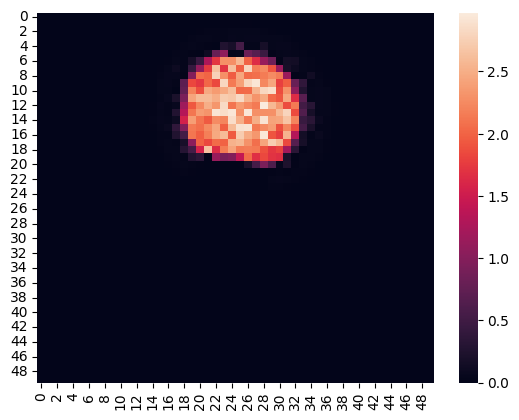

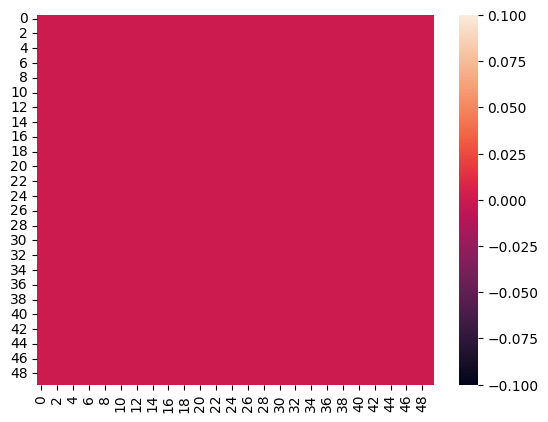

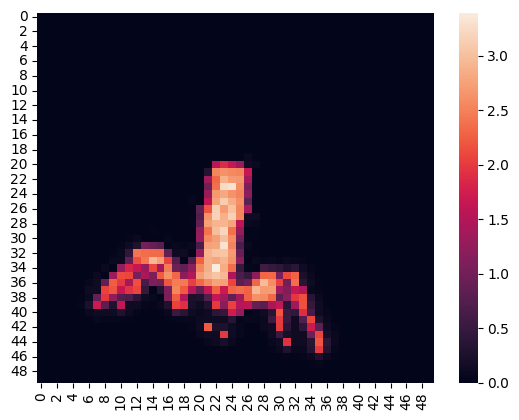

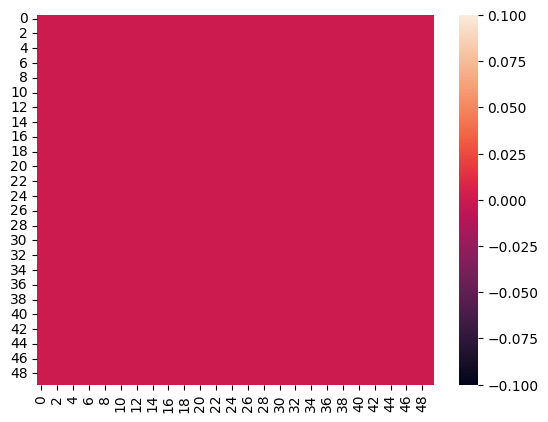

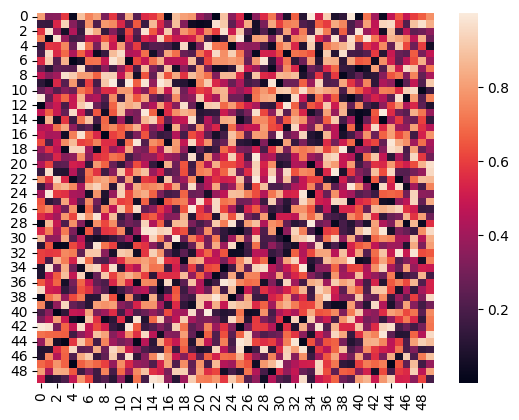

[0.59714389 0.73987538 0.58315837]
[0.6079278  1.29065907 0.17853166]
[ 1.16178906 -0.19401102  1.46979666]
[ 0.39563474  0.60965037  0.97370553 -0.0644522 ]
[0.33796304 0.55260563 0.3539038  0.45781755]
[0.09566922 0.47317606 0.3716341  0.98209357]
[  3.    3.  100.   10.    0.1]


In [256]:
sns.heatmap(target)
plt.show()
sns.heatmap(ag[0])
plt.show()
sns.heatmap(ag[1])
plt.show()
sns.heatmap(ag[2])
plt.show()
sns.heatmap(ag[3])
plt.show()
sns.heatmap(ag[4])
plt.show()
sns.heatmap(ag[5])
plt.show()
print(ag[-1, 0, :3])
print(ag[-1, 2, :3])
print(ag[-1, 4, :3])
print(ag[-2, 1, :4])
print(ag[-4, 1, :4])
print(ag[-6, 1, :4])
print(ag[-1, -1, :5])

In [257]:
costs = []
init = []
res_ = []
time_ = []

In [258]:
for i in range(1, 5):
    data = h5py.File(f"/home/samani/Documents/projects/master_project/model/results/model_7/phage{i}.h5", "a")
    costs.append(data["cost"][:])
    init.append(data['initial_conditions'][:])
    res_.append(data['simulation_results'][:])
    time_.append(data['time'][:])

<Axes: >

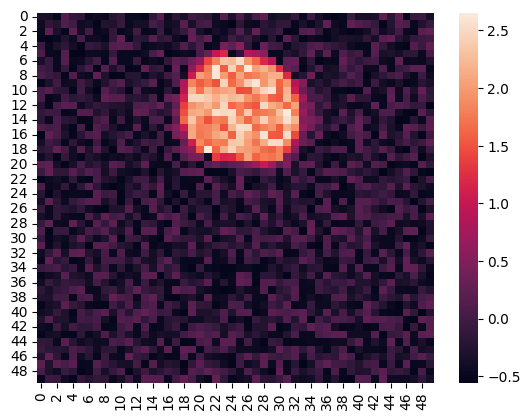

In [275]:
sns.heatmap(init[0][0, -1, :, :])

In [274]:
print(init[0].shape)

(2, 20, 50, 50)


In [259]:
c = 0
for i in range(len(costs)):
    c += len(costs[i])

In [260]:
print(c)

85


In [218]:
cv = []

for i in costs:
    cc = []
    j = 0
    for h in i:
        if j % 2 == 0:
            cc.append(float(h))
        j += 1
    cv.append(cc)   

/tmp/ipykernel_7374/310298551.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cc.append(float(h))


In [262]:
cost_ = []
for c in costs:
    for i in c:
        cost_.append(i)

In [266]:
cost_ = np.array(cost_)
print(cost_)
print(cost_.shape)

[[1.76907755 1.08083123]
 [1.19313472 1.00991938]
 [1.07490758 0.9796665 ]
 [1.0354849  0.95919767]
 [1.0188765  0.93449951]
 [1.00994717 0.89772321]
 [0.99460846 0.85096665]
 [0.97160305 0.79214843]
 [0.93745306 0.73734229]
 [0.88985701 0.6804996 ]
 [0.83736713 0.63144799]
 [0.77953041 0.58212712]
 [0.72817946 0.5373738 ]
 [0.6805226  0.49360532]
 [0.64195257 0.45363897]
 [0.60760394 0.41227846]
 [0.57919048 0.36629071]
 [0.55360423 0.31068259]
 [0.5303869  0.24874903]
 [0.50863415 0.18478251]
 [0.48697969 0.13182436]
 [0.32733648 0.06034556]
 [0.13541732 0.05849127]
 [0.07622046 0.05538288]
 [0.08182665 0.0457235 ]
 [0.06383638 0.03509779]
 [0.03528928 0.02787218]
 [0.01737816 0.02486029]
 [0.01518811 0.02194039]
 [0.02125904 0.02031634]
 [0.02608522 0.01664235]
 [0.07863268 0.03321969]
 [0.0206943  0.01234037]
 [0.01319572 0.01055386]
 [0.01266932 0.00951266]
 [0.0109498  0.00863024]
 [0.01056112 0.00858933]
 [0.01023856 0.00854467]
 [0.00988608 0.0085109 ]
 [0.00959705 0.00847293]


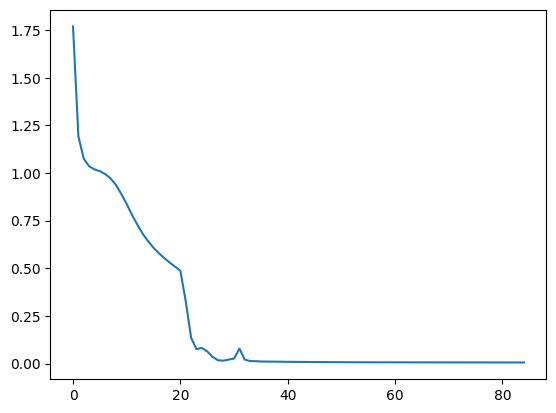

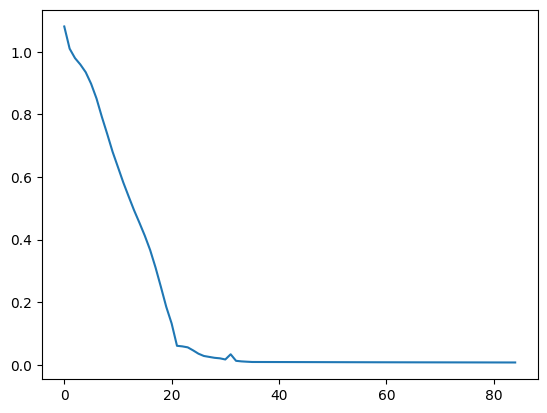

In [267]:
plt.plot(cost_[:, 0])
plt.show()
plt.plot(cost_[:, 1])

In [277]:
for i in costs:
    print(len(i))
for i in res_:
    print(i.shape)
for i in init:
    print(i.shape)

20
10
5
50
(2, 20, 50, 50)
(2, 20, 50, 50)
(2, 20, 50, 50)
(2, 50, 50, 50)
(2, 20, 50, 50)
(2, 20, 50, 50)
(2, 20, 50, 50)
(2, 50, 50, 50)


In [278]:
# 235
init_ = np.zeros((2, 85, 50, 50))
sim_ = np.zeros((2, 85, 50, 50))
init_[:, :20, :, :] = init[0][:, :20, :, : ]
init_[:, 20:30, :, :] = init[1][:, :10, :, : ]
init_[:, 30:35, :, :] = init[2][:, :5, :, : ]
init_[:, 35:, :, :] = init[3][:, :, :, : ]
#init_[100:, :, :] = init[4][0]

sim_[:, :20, :, :] = res_[0][:, :20, :, : ]
sim_[:, 20:30, :, :] = res_[1][:, :10, :, : ]
sim_[:, 30:35, :, :]  = res_[2][:, :5, :, : ]
sim_[:, 35:, :, :]  = res_[3][:, :, :, : ]
#sim_[100:, :, :] = res_[4][0]




<Axes: >

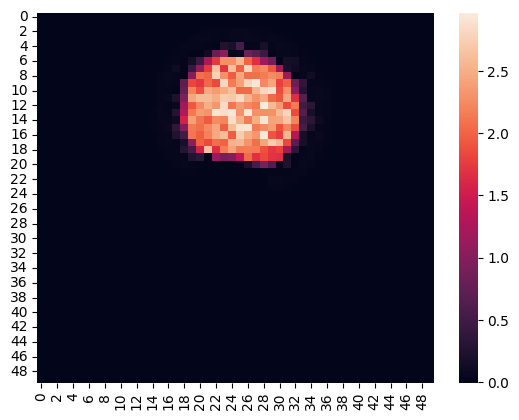

In [283]:
#sns.heatmap(init_[-1])
#plt.show()
sns.heatmap(init_[0, -1])

In [284]:
print(time_)

[array([ 756.82019782,  772.30266571,  763.58700633,  758.31788898,
       3051.49126577]), array([718.56187487, 726.85866022]), array([752.4334147]), array([ 727.0062387 ,  740.60486674,  737.15432072,  727.3550663 ,
        717.40443587,  713.08554268,  704.2229166 ,  695.63117743,
        691.48986506,  690.38575435, 7144.36340642])]


In [287]:
time = 3051.49126577 + 7144.36340642 + 752.4334147 + 718.56187487 + 726.85866022 - 2000

In [288]:
print(time)

10393.708621979998


In [289]:
times = np.array(time)

In [290]:
print(time)

10393.708621979998


In [291]:
with h5py.File('data.h5', 'w') as hdf_file:
    
    hdf_file.create_dataset('time', data=times)
    hdf_file.create_dataset('initial_conditions', data=init_)
    hdf_file.create_dataset('simulation_results', data=sim_)
    hdf_file.create_dataset('agent', data=ag)
    hdf_file.create_dataset('target', data=target)
    hdf_file.create_dataset('cost', data=cost_)   